In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#getting data
df = pd.read_csv('C:/Users/Yogendra/Downloads/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
#understandung data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
tax_value=[]
for i in df['Taxable.Income']:
 if i<=30000:
     tax_value.append("risky")
 else:
     tax_value.append("Good")
df['tax_value']=tax_value

In [5]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   tax_value        600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


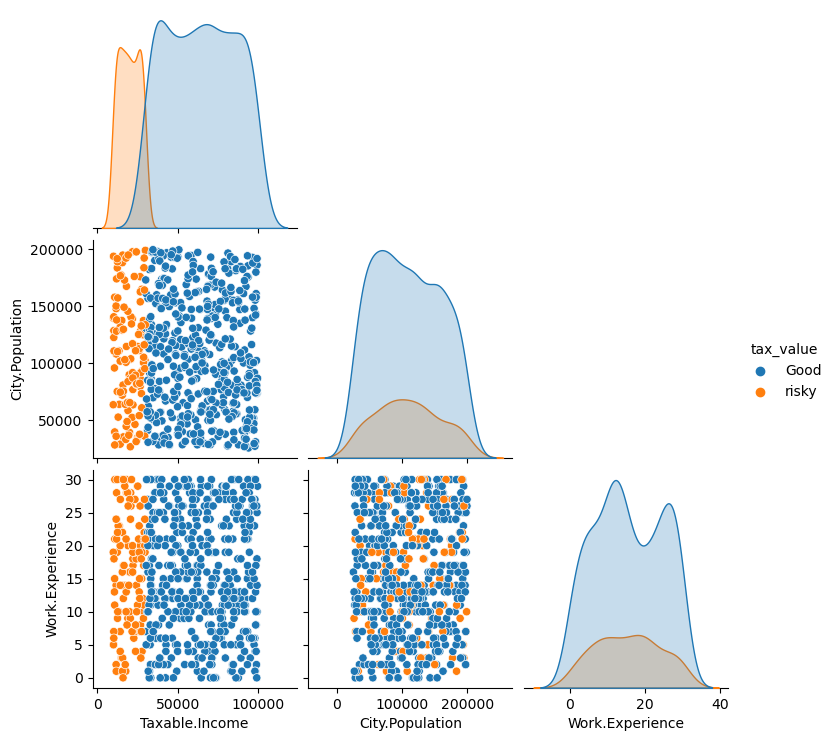

In [7]:
sns.pairplot(df, hue="tax_value", corner=True)

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_18504\1202620626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="crest")


<Axes: >

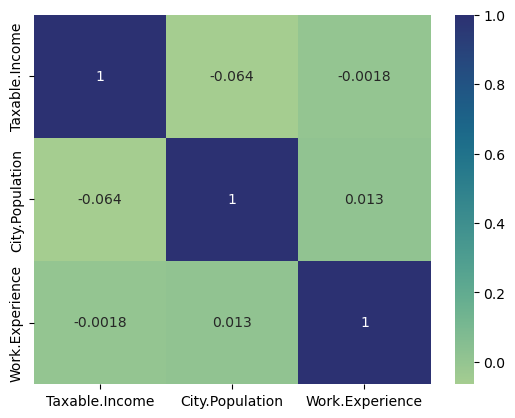

In [8]:
sns.heatmap(df.corr(),annot=True,cmap="crest")

In [9]:
df.drop(['Taxable.Income'], axis=1, inplace=True)
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [10]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [11]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
tax_value          0
dtype: int64

In [12]:
df['tax_value'].unique()

array(['Good', 'risky'], dtype=object)

In [13]:
df.tax_value.value_counts()

Good     476
risky    124
Name: tax_value, dtype: int64

In [14]:
#encoding the categorical columns
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']=label_encoder.fit_transform(df['Marital.Status'])
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['tax_value']=label_encoder.fit_transform(df['tax_value'])
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [15]:
#getting data for test train split
x=df.iloc[:,:5]
y=df['tax_value']

In [16]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_value, Length: 600, dtype: int32

In [18]:
#splitting data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [34]:
#Building Decision Tree Classifier using Entropy Criteria
entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
entropy.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[2] <= 58380.0\nentropy = 0.726\nsamples = 480\nvalue = [383, 97]'),
 Text(0.3, 0.625, 'x[2] <= 52675.0\nentropy = 0.577\nsamples = 102\nvalue = [88, 14]'),
 Text(0.2, 0.375, 'x[3] <= 27.5\nentropy = 0.669\nsamples = 80\nvalue = [66, 14]'),
 Text(0.1, 0.125, 'entropy = 0.739\nsamples = 67\nvalue = [53, 14]'),
 Text(0.3, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.7, 0.625, 'x[2] <= 58845.5\nentropy = 0.759\nsamples = 378\nvalue = [295, 83]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'x[2] <= 140941.5\nentropy = 0.756\nsamples = 377\nvalue = [295, 82]'),
 Text(0.7, 0.125, 'entropy = 0.798\nsamples = 236\nvalue = [179, 57]'),
 Text(0.9, 0.125, 'entropy = 0.674\nsamples = 141\nvalue = [116, 25]')]

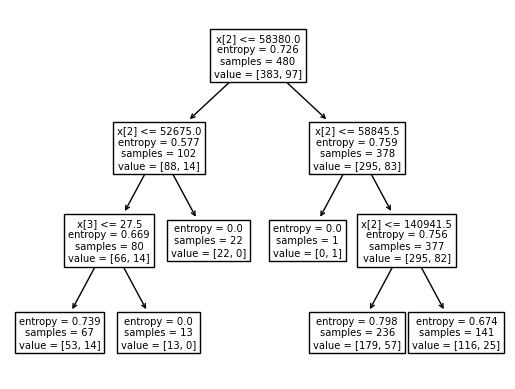

In [35]:
tree.plot_tree(entropy)

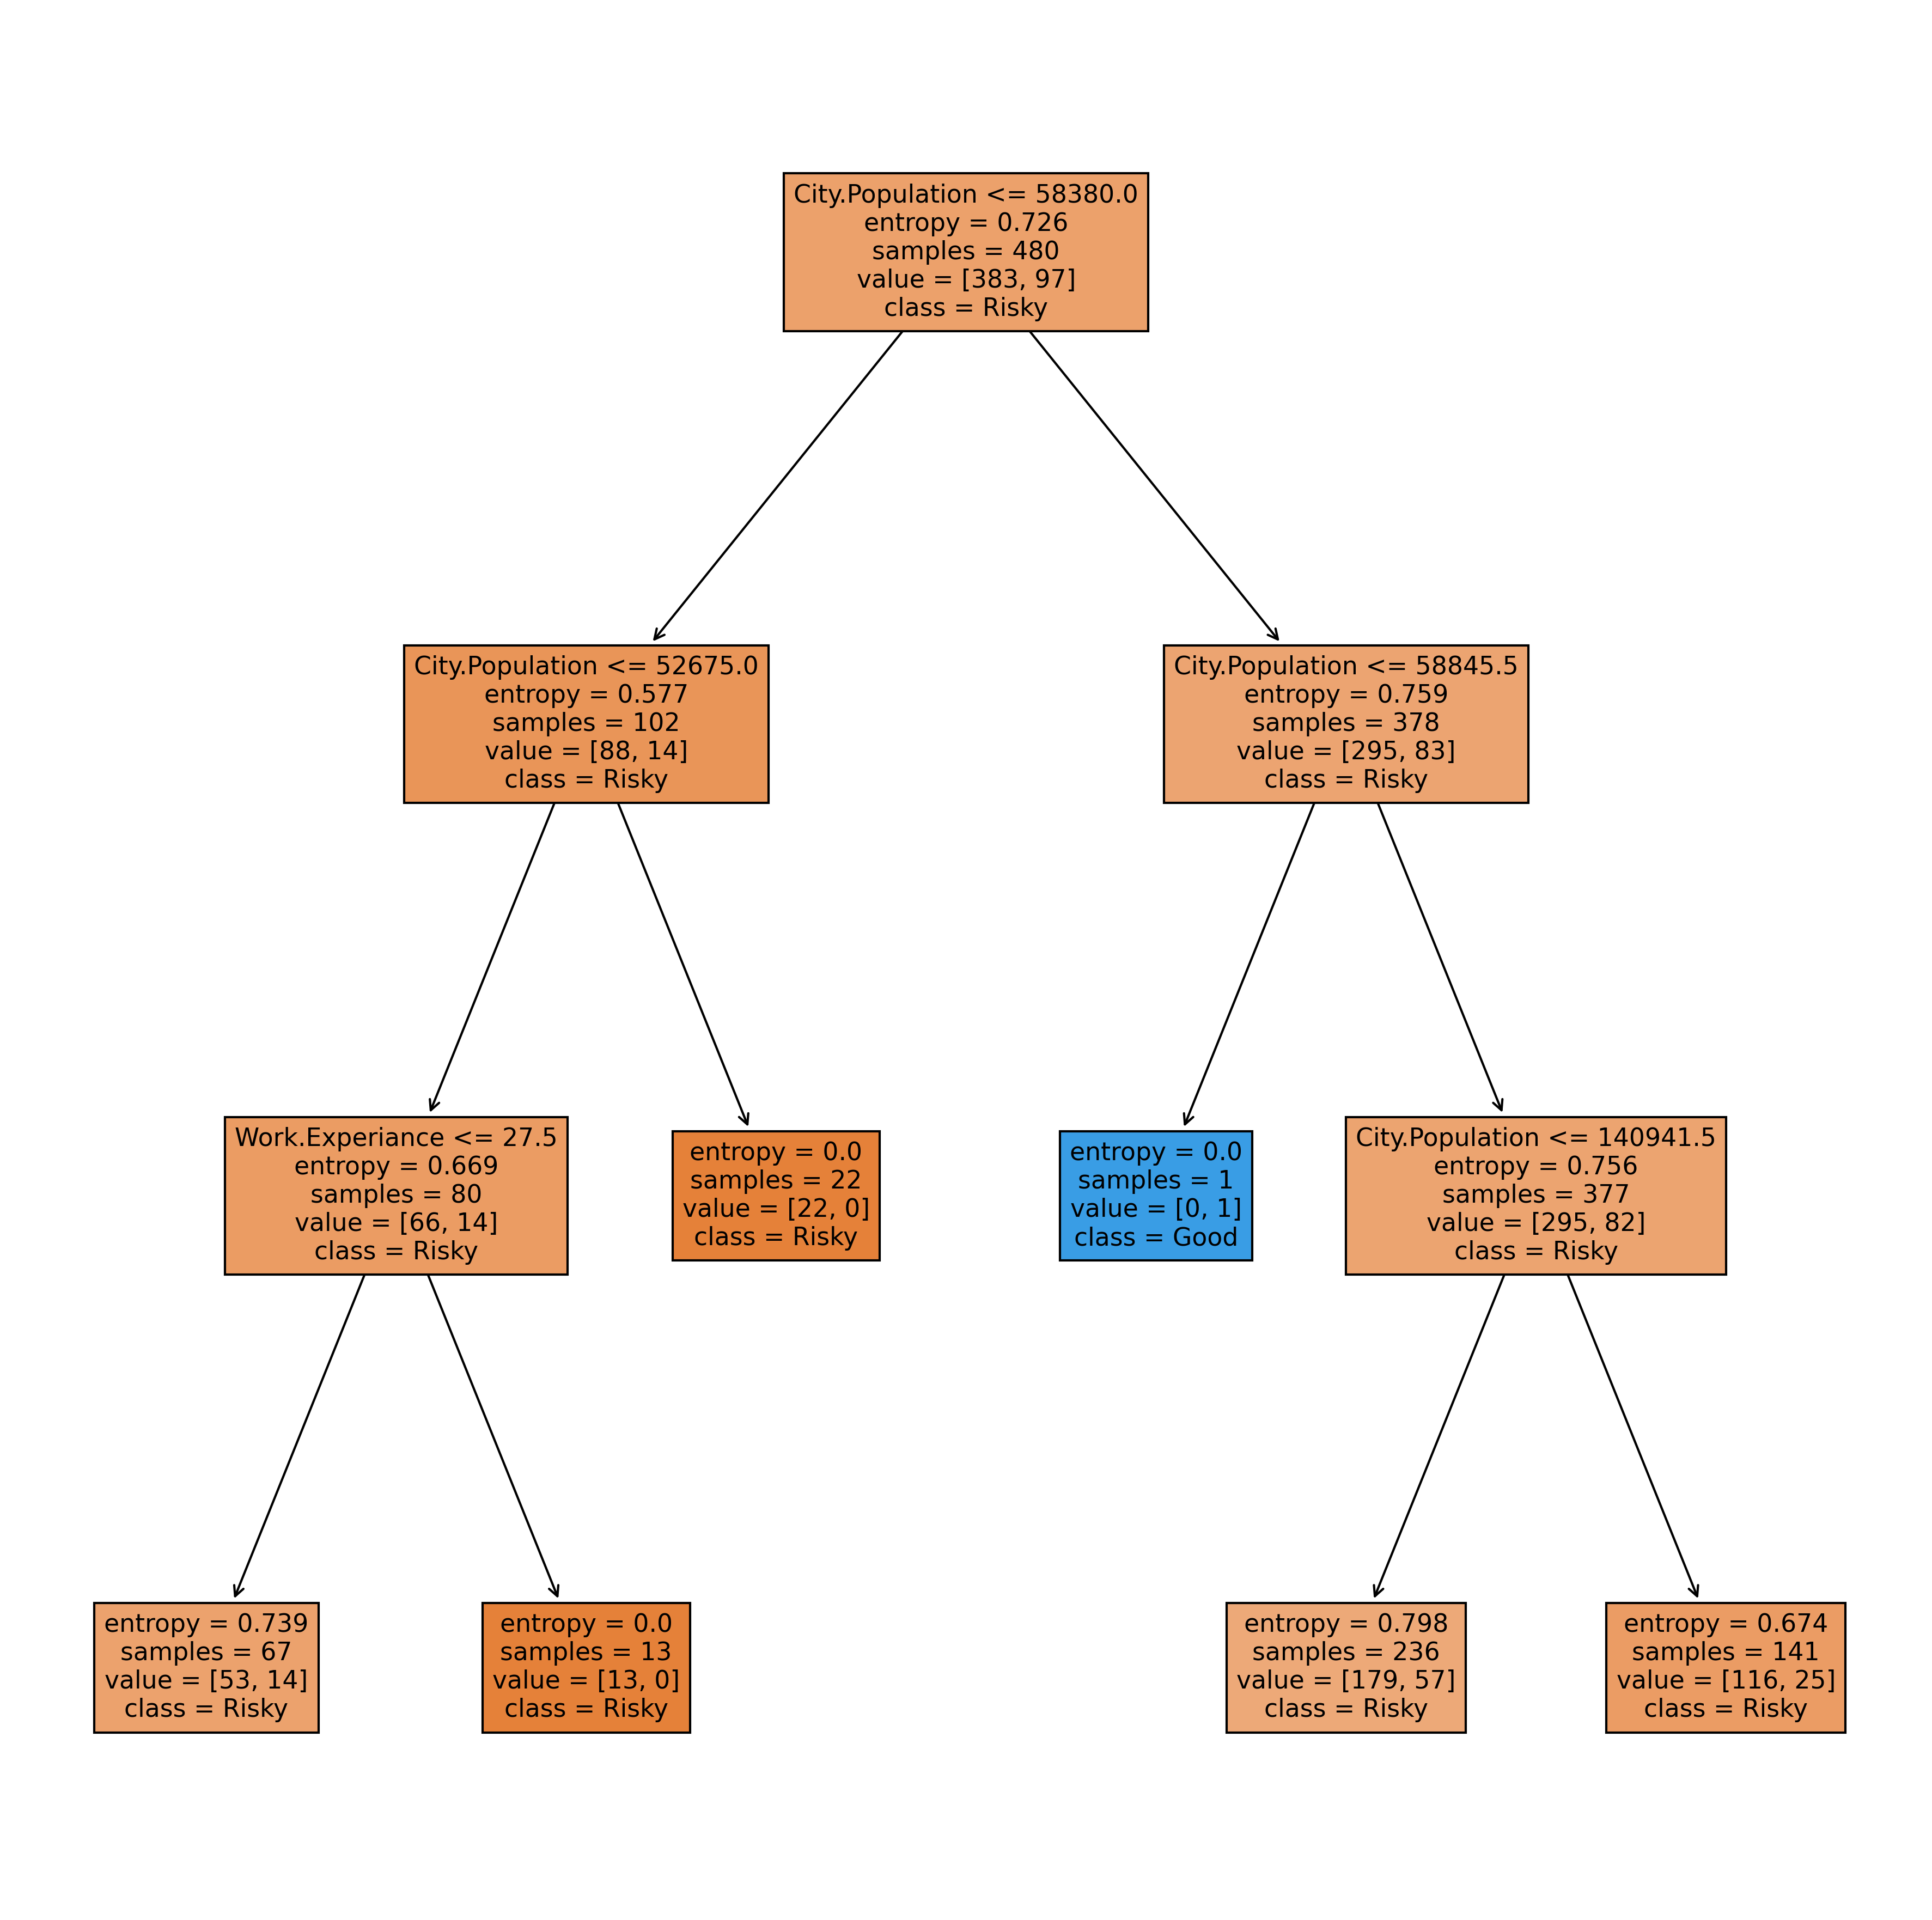

In [36]:
fn = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [37]:
entropy.feature_importances_

array([0.        , 0.        , 0.74659302, 0.25340698, 0.        ])

In [38]:
feature = pd.Series(entropy.feature_importances_,index=fn).sort_values(ascending=False) 
feature

City.Population    0.746593
Work.Experiance    0.253407
Undergrad          0.000000
Marital.Status     0.000000
Urban              0.000000
dtype: float64

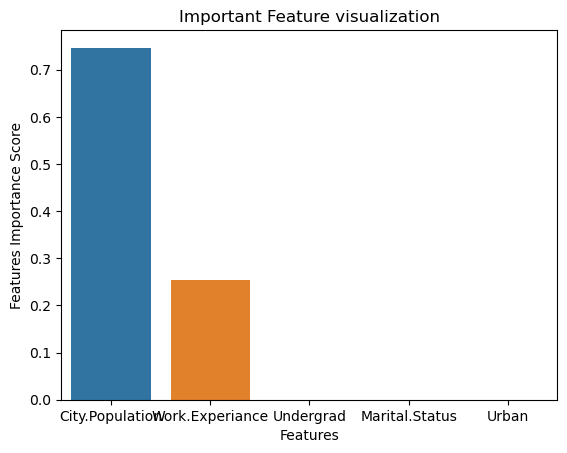

In [39]:
sns.barplot(x=feature.index, y=feature)
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Important Feature visualization")
plt.show()

In [40]:
#Predicting test data
y_pred = entropy.predict(x_test)                   
pd.Series(y_pred).value_counts()

0    120
dtype: int64

In [41]:
pd.crosstab(y_test,y_pred)

col_0,0
tax_value,
0,93
1,27


In [42]:
np.mean(y_pred==y_test)

0.775

In [43]:
#Building Decision Tree Classifier (CART) using Gini Criteria
gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [45]:
gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5416666666666666, 0.875, 'x[2] <= 58380.0\ngini = 0.322\nsamples = 480\nvalue = [383, 97]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 39943.0\ngini = 0.237\nsamples = 102\nvalue = [88, 14]'),
 Text(0.16666666666666666, 0.375, 'x[3] <= 21.5\ngini = 0.359\nsamples = 47\nvalue = [36, 11]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.424\nsamples = 36\nvalue = [25, 11]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.5, 0.375, 'x[2] <= 52675.0\ngini = 0.103\nsamples = 55\nvalue = [52, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.165\nsamples = 33\nvalue = [30, 3]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.75, 0.625, 'x[2] <= 58845.5\ngini = 0.343\nsamples = 378\nvalue = [295, 83]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.375, 'x[2] <= 191506.5\ngini = 0.34\nsamples = 377\nvalue = [295, 82]'),
 Text(0.75, 0.125, 'gini = 0.33\nsamples = 350

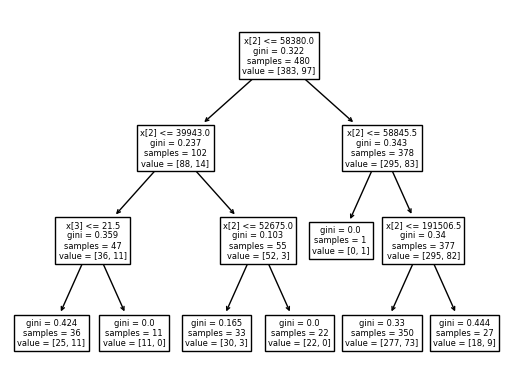

In [46]:
tree.plot_tree(gini)

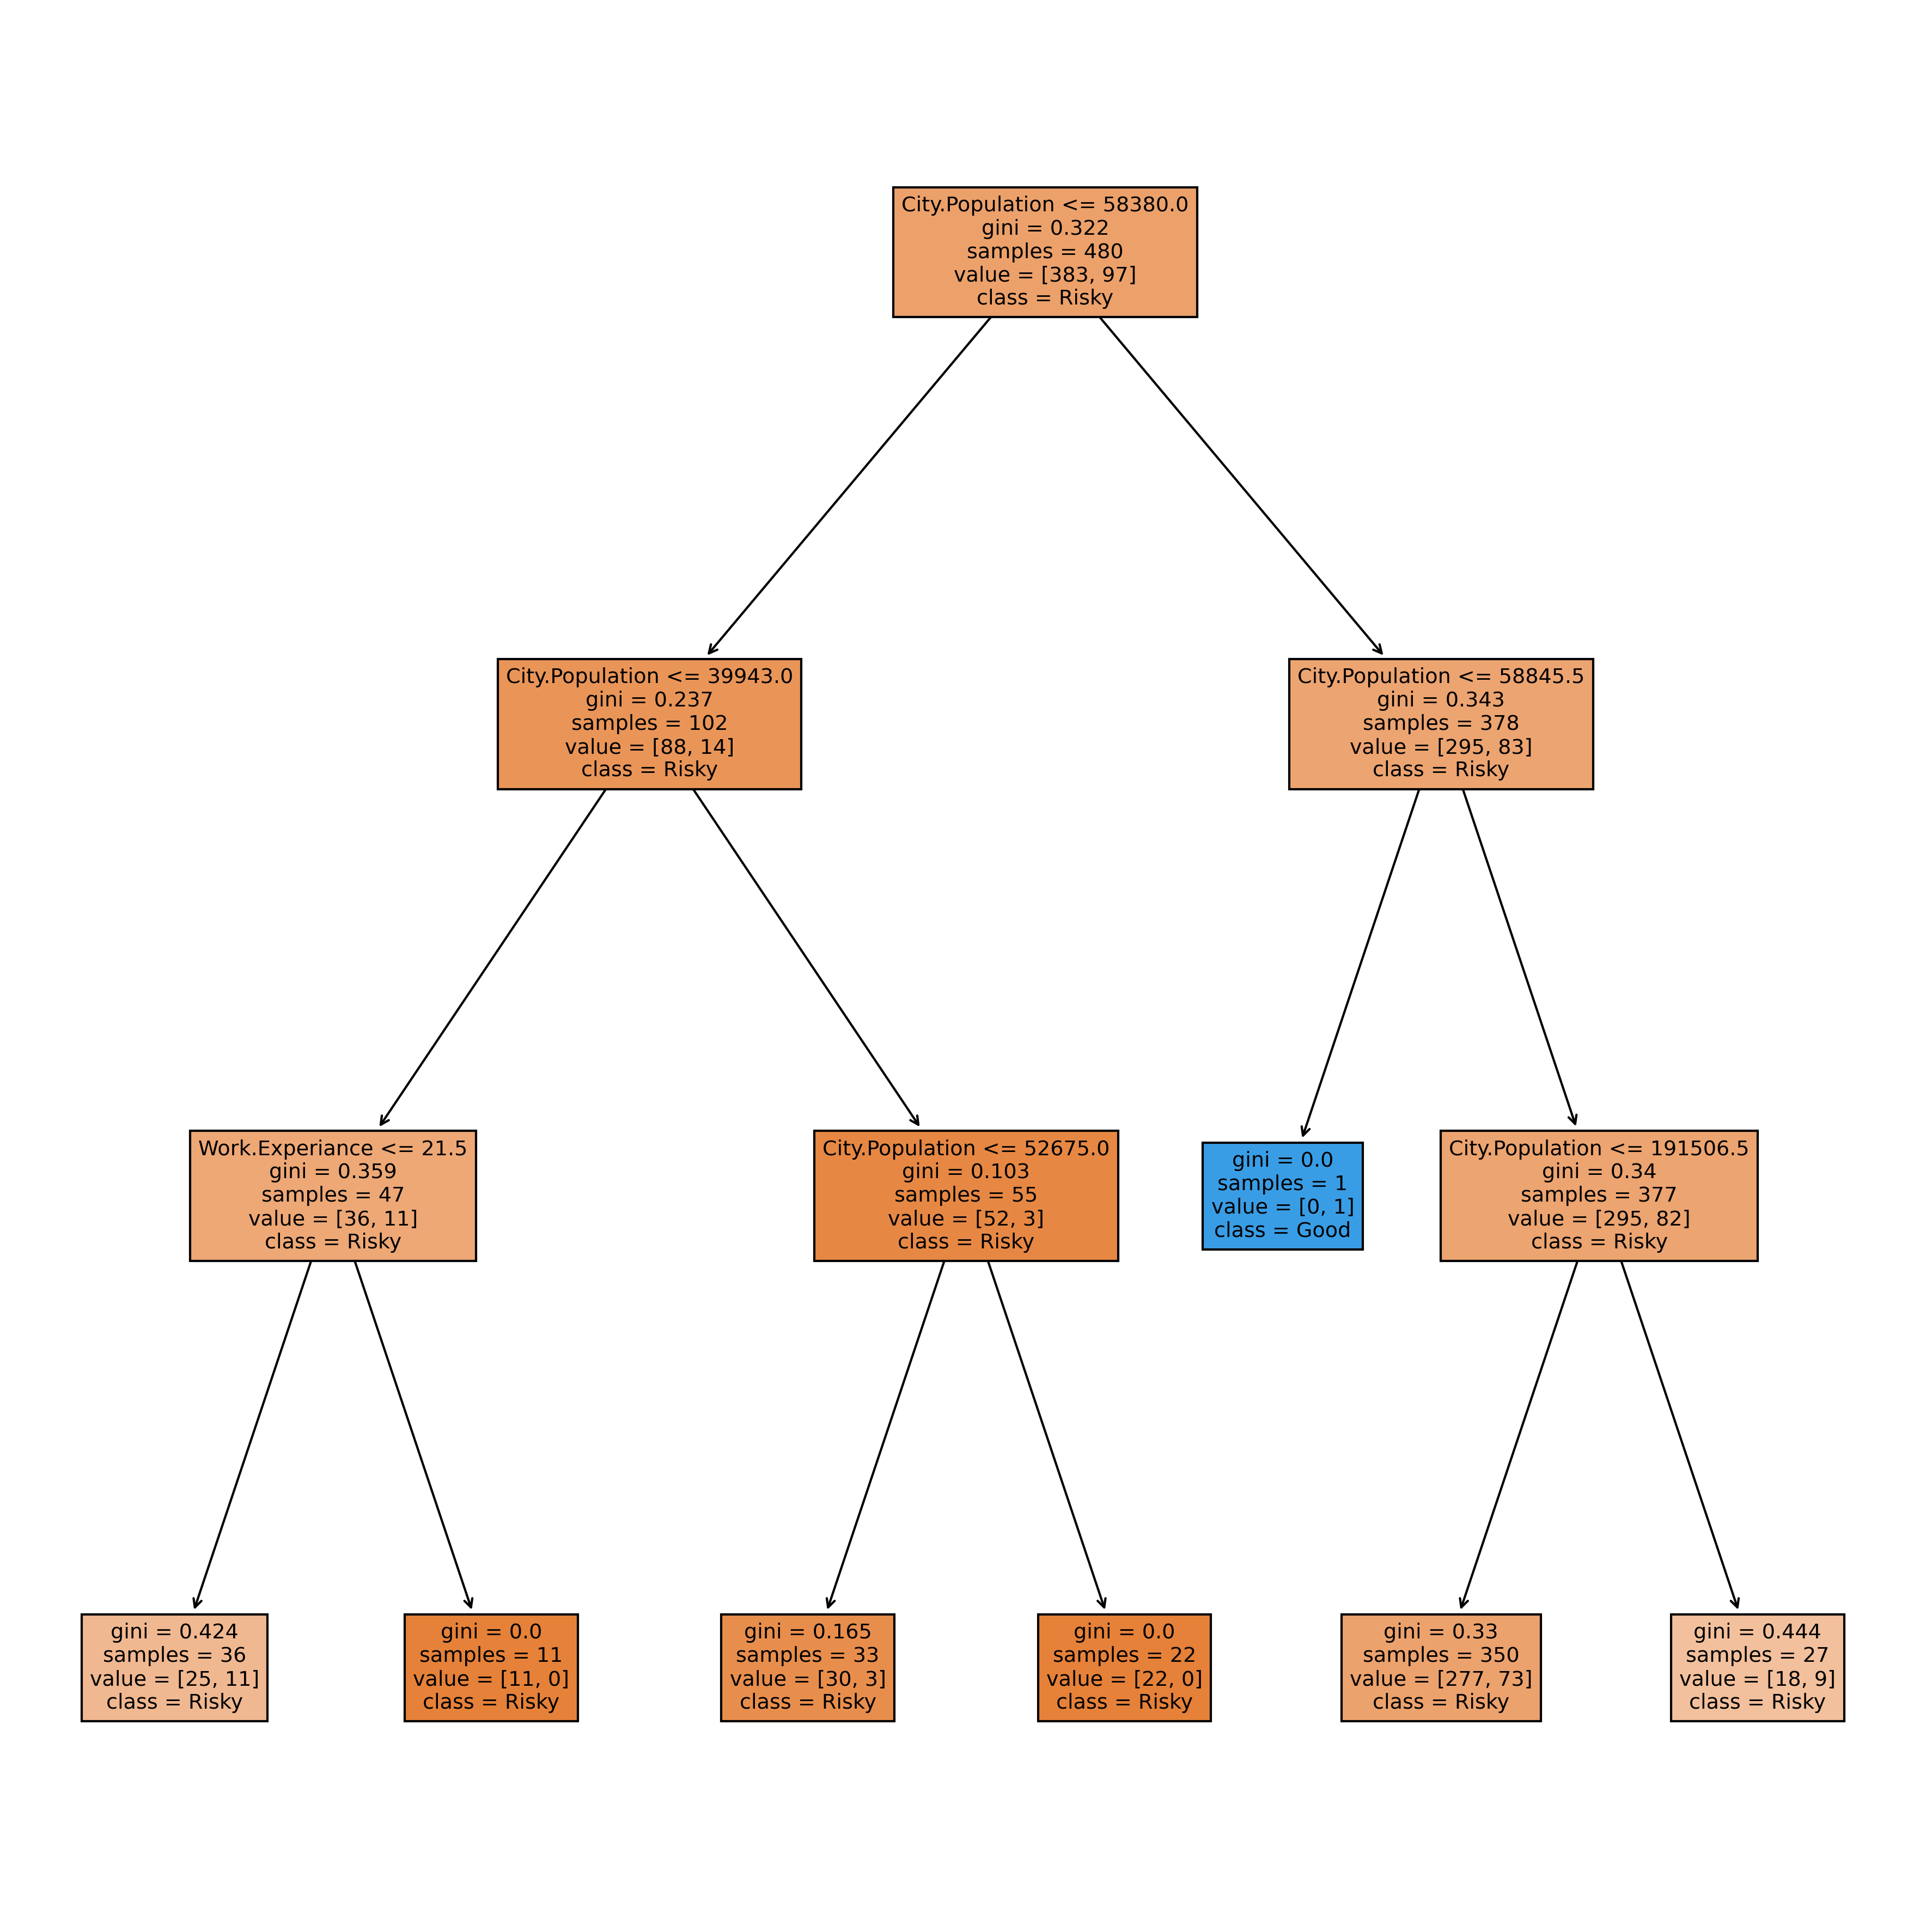

In [47]:
fn = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [48]:
gini.feature_importances_

array([0.      , 0.      , 0.758511, 0.241489, 0.      ])

In [49]:
feature = pd.Series(gini.feature_importances_,index=fn).sort_values(ascending=False) 
feature

City.Population    0.758511
Work.Experiance    0.241489
Undergrad          0.000000
Marital.Status     0.000000
Urban              0.000000
dtype: float64

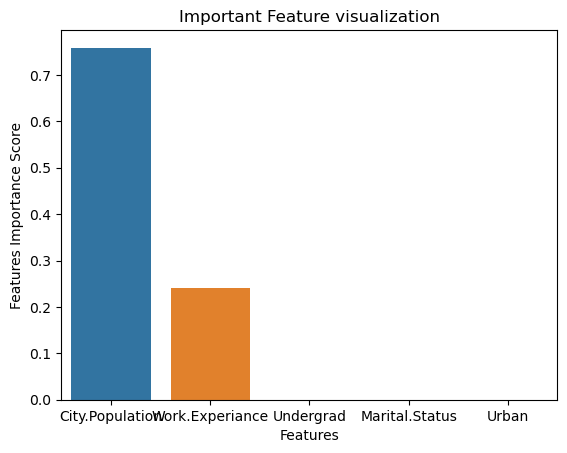

In [50]:
sns.barplot(x=feature.index, y=feature)
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Important Feature visualization")
plt.show()

In [51]:
#Predicting test data
y_pred = gini.predict(x_test)                   
pd.Series(y_pred).value_counts()

0    120
dtype: int64

In [52]:
pd.crosstab(y_test,y_pred)

col_0,0
tax_value,
0,93
1,27


In [53]:
np.mean(y_pred==y_test)

0.775

In [ ]:
#As evident from from entropy and gini models, both have worked almost identically in this case due to less no of features that the compay data model